## 3.1 Classification with a single-layer perceptron

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#np.random.seed(1)

global acc_P
acc_P = []
global error_p
error_p = []

"""
3.1.1 Generation of linearly-separable data
"""
def generate_data(N, B):
    Amean1, Amean2, Astd1, Astd2 = -5, 5, 3, 1
    ClassA = np.random.normal(loc=[Amean1, Amean2], scale=[Astd1, Astd2], size=(N, 2))

    Bmean3, Bmean4, Bstd3, Bstd4 = 2, -2, 2, 1
    ClassB = np.random.normal(loc=[Bmean3, Bmean4], scale=[Bstd3, Bstd4], size=(N, 2))

    # create target
    if B == True:
        bias = np.ones((100, 1))
        pos = np.column_stack([ClassA[:, 0], ClassA[:, 1], bias])
        neg = np.column_stack([ClassB[:, 0], ClassB[:, 1], bias])
    
    elif B == False:
        pos = np.column_stack([ClassA[:, 0], ClassA[:, 1]])
        neg = np.column_stack([ClassB[:, 0], ClassB[:, 1]])

    all_patterns = np.concatenate([pos, neg])

    targets = np.ones(N, dtype=np.int)
    minus = -1 * np.ones(N, dtype=np.int)
    targets = np.append(targets, minus)  # (200,)

    all_samples = np.column_stack([all_patterns, targets])
    np.random.shuffle(all_samples)

    if B == True:
      patterns = all_samples[:200, :3]
      targets = all_samples[:200, 3]

      test_patterns = all_samples[:200, :3]  # (200, 3)
      test_targets = all_samples[:200, 3].reshape(1, -1)  # (1, 200)
    
    elif B == False:
      patterns = all_samples[:200, :2]
      targets = all_samples[:200, 2]

      test_patterns = all_samples[:200, :2]  # (200, 2)
      test_targets = all_samples[:200, 2].reshape(1, -1)  # (1, 200)
    
    return ClassA, ClassB, test_patterns, test_targets #, patterns, targets
  

"""
3.1.2 Classification with a single-layer perceptron and analysis
"""
def initialW():
    W_nobias = np.random.normal(loc=0.0, scale=0.2, size=(2))
    bias = np.ones((1),dtype=np.int)
    W = np.concatenate((W_nobias, bias)).reshape(1, -1) #(1, 3)
    return W, W_nobias.reshape(1, -1)

  
def perceptron(x, w, targets, eta, iter):
    wx = np.dot(w, x)
    y = np.where(wx > 0, 1, -1)

    test = []
    for i in range(y.shape[1]):
        if y[0, i] == targets[0, i]:
            test.append(1)
    acc = np.sum(test)/y.shape[1]
    acc_P.append(acc)

    if ((np.array_equal(y, targets) == False) and (iter < 100)):
        iter +=1
        w_new = w - eta * np.dot(y - targets, x.T)
        error_p.append(np.dot(np.dot(y - targets, x.T), np.dot(y - targets, x.T).T)[0, 0] / 2)

        return perceptron(x, w_new, targets, eta, iter)
    
    return w


def delta(x, w, targets, eta, iter, MODE):
     error_d = []
     if MODE == "batch":
          print("batch")
          it = 0
          acc_D = []
          while(it < iter):
            it += 1
            wx = np.dot(w, x).reshape(1, -1) #(1,200)
            # accuarcy
            y = np.where(wx > 0, 1, -1)
            match = y==targets
            tr = np.where(match[0]==True)[0]
            acc = len(tr)/targets.shape[1]
            acc_D.append(acc)
        
            # update w
            if (np.array_equal(y, targets)== True):
              print("batch mode of Delta rule converges in {} epochs".format(it))
              break
            else:
              err = wx - targets
              w -= eta * np.dot(err, x.T)
              error_d.append(np.dot(np.dot(err, x.T), np.dot(err, x.T).T)[0, 0]/2)
          
          return w, acc_D #, error_d
      
     if MODE == "seq":
          it = 0
          acc_d = []
          while(it < iter):
            it += 1
            # accuarcy
            y = np.where(np.dot(w, x) > 0, 1, -1)
            match = y==targets
            tr = np.where(match[0]==True)[0]
            acc = len(tr)/targets.shape[1]
            acc_d.append(acc)
            
            # update w
            if (np.array_equal(y, targets)== True):
              print("sequential Delta rule converges in {} epochs".format(it))
              break
            else:
              for i in range(targets.shape[1]):
                err = np.dot(w, x[:,i]) - targets[0,i]
                dw = -eta * np.dot(err.reshape(1,-1), x[:,i].reshape(1,-1))
                w += dw
                #error_d.append(np.dot(np.dot(err, x.T), np.dot(err, x.T).T)[0, 0]/2)
                             
          return w, acc_d
        

def plotdecision_boundary(w_p, w_d, A, B):
    x = np.linspace(-10, 10, 100)
    if w_p.shape[1]==3:
      y_p = (-x * w_p[0, 0] - w_p[0, 2])/w_p[0, 1]
    elif w_p.shape[1]==2:
      y_p = (-x * w_p[0, 0])/w_p[0, 1]
    if w_d.shape[1]==3:
      y_d = (-x * w_d[0, 0] - w_d[0, 2])/w_d[0, 1]
    elif w_d.shape[1]==2:
      y_d = (-x * w_d[0, 0])/w_d[0, 1]
    plt.figure()
    plt.plot(x, y_p, 'r-') # perceptron
    plt.plot(x, y_d, 'b-') # delta
    plt.plot(A[:, 0], ClassA[:, 1], '.')
    plt.plot(ClassB[:, 0], ClassB[:, 1], 'o')
    plt.axis('equal')
    plt.grid()
    plt.show()


def ploterror(error_p, error_d):
    plt.figure()
    plt.plot(error_p, 'r')
    plt.plot(error_d, 'b')
    plt.show()


def plotacc(acc_p, acc_d):
    plt.figure()
    plt.plot(acc_p, 'r')
    plt.plot(acc_d, 'b')
    plt.show()
  
    
# Main
ClassA, ClassB, test_patterns, test_targets = generate_data(100, B=True)
W, W_nobias = initialW()
### Apply and compare perceptron learning with the Delta learning rule in batch mode
percep = perceptron(test_patterns.T, W, test_targets, 0.001, iter=0)
delt, acc_D = delta(test_patterns.T, W, test_targets, 0.0001, iter=100, MODE="batch")
#plotdecision_boundary(percep, delt, ClassA, ClassB)
#ploterror(error_p, error_d)
#plotacc(acc_P, acc_D)


### Compare sequential with a batch learning approach for the Delta rule.
delt_seq, acc_d = delta(test_patterns.T, W, test_targets, 0.0001, iter=100, MODE="seq")
#plotacc(acc_D, acc_d)
#plotdecision_boundary(delt, delt_seq, ClassA, ClassB)

### Remove the bias, train your network with the Delta rule in batch mode.
ClassA, ClassB, patterns, targets = generate_data(100, B=False)
delt_nobias, acc_dd = delta(patterns.T, W_nobias, targets, 0.0001, iter=100, MODE="batch")
#plotacc(acc_D, acc_dd)
#plotdecision_boundary(delt, delt_nobias, ClassA, ClassB)



batch
batch mode of Delta rule converges in 86 epochs
sequential Delta rule converges in 1 epochs
batch


### 3.1.3 Classification of samples that are not linearly separable

In [ ]:
def generate_nonLinearData(N):
    """
    3.1.3 Generation of non-linearly-separable data
    """
    Amean1, Amean2, Astd1, Astd2 = -5, 5, 3, 2
    ClassA = np.random.normal(loc=[Amean1, Amean2], scale=[Astd1, Astd2], size=(N, 2))

    Bmean3, Bmean4, Bstd3, Bstd4 = -2, 3, 3, 2
    ClassB = np.random.normal(loc=[Bmean3, Bmean4], scale=[Bstd3, Bstd4], size=(N, 2))

    # create target
    bias = np.ones((100, 1))
    pos = np.column_stack([ClassA[:, 0], ClassA[:, 1], bias])
    neg = np.column_stack([ClassB[:, 0], ClassB[:, 1], bias])

    all_patterns = np.concatenate([pos, neg])

    targets = np.ones(N, dtype=np.int)
    minus = -1 * np.ones(N, dtype=np.int)
    targets = np.append(targets, minus)  # (200,)

    all_samples = np.column_stack([all_patterns, targets])
    np.random.shuffle(all_samples)


    patterns = all_samples[:200, :3]
    targets = all_samples[:200, 3]

    test_patterns = all_samples[:200, :3]  # (200, 3)
    test_targets = all_samples[:200, 3].reshape(1, -1)  # (1, 200)
    
    return ClassA, ClassB, test_patterns, test_targets

def plot_data(A, B):
  plt.figure()
  plt.plot(A[:, 0], A[:, 1], '.')
  plt.plot(B[:, 0], B[:, 1], 'o')
  plt.axis('equal')
  plt.grid()
  plt.show()
  
#NL_ClassA, NL_ClassB, NL_test_patterns, NL_test_targets = generate_nonLinearData(100)
#plot_data(NL_ClassA, NL_ClassB)


### Apply and compare perceptron learning with the Delta learning rule in batch mode
#NL_percep = perceptron(NL_test_patterns.T, W, NL_test_targets, 0.001, iter=0)
#NL_delt, NL_acc_D = delta(NL_test_patterns.T, W, NL_test_targets, 0.0001, iter=100, MODE="batch")

#plotdecision_boundary(NL_percep, NL_delt, NL_ClassA, NL_ClassB)
#ploterror()
#plotacc(acc_P, NL_acc_D)


#### generate STD non-linear data

def generate_STD_nonLinearData(N):
    """
    3.1.3 Generation of non-linearly-separable data
    """
    Amean1, Amean2, Astd1, Astd2 = 1.0, 0.3, 0.2, 0.2
    ClassA = np.random.normal(loc=[0, 0], scale=[1, 1], size=(N, 2))

    Bmean3, Bmean4, Bstd3, Bstd4 = 0.0, -0.1, 0.3, 0.3
    ClassB = np.random.normal(loc=[0, 0], scale=[1, 1], size=(N, 2))

    ClassA[:, 0] = ClassA[:, 0]*Astd1 - Amean1
    ClassA[:, 1] = ClassA[:, 1]*Astd2 + Amean2

    ClassB[:, 0] = ClassB[:, 0]*Bstd3 + Bmean3
    ClassB[:, 1] = ClassB[:, 1]*Bstd4 + Bmean4

    # create target
    bias = np.ones((N, 1))
    pos = np.column_stack([ClassA[:, 0], ClassA[:, 1], bias])
    neg = np.column_stack([ClassB[:, 0], ClassB[:, 1], bias])

    all_patterns = np.concatenate([pos, neg])

    targets = np.ones(N, dtype=np.int)
    minus = -1 * np.ones(N, dtype=np.int)
    targets = np.append(targets, minus)  # (200,)

    all_samples = np.column_stack([all_patterns, targets])

    np.random.shuffle(all_samples)

    patterns = all_samples[:N*2, :3]
    targets = all_samples[:N*2, 3]

    test_patterns = all_samples[:N*2, :3]  # (200, 3)
    test_targets = all_samples[:N*2, 3].reshape(1, -1)  # (1, 200)

    # data prepared for sampling
    targets = np.ones((N,1),dtype=np.int)
    all_samples_classA = np.column_stack([ClassA[:, 0], ClassA[:, 1], bias, targets])
    all_samples_classB = np.column_stack([ClassB[:, 0], ClassB[:, 1], bias,-targets])

    return ClassA, ClassB, test_patterns, test_targets, all_samples_classA, all_samples_classB

#np.random.seed(1)
NL_ClassA, NL_ClassB, NL_test_patterns, NL_test_targets, NL_all_samples_classA, NL_all_samples_classB = generate_STD_nonLinearData(100)
#plot_data(NL_ClassA, NL_ClassB)

# apply Delta learning rule in batch mode to different datasets

def divideData(data,percent):
    """
    divides data into training data and test data
    """
    N = data.shape[0]
    np.random.shuffle(data)
    trainData = data[:int(N*(1-percent)),]
    testData = data[int(N*(1-percent)):,]
  
    train_patterns = trainData[:,:3]
    train_targets = trainData[:,3] #.reshape(1,N-percent)
    test_patterns = testData[:,:3]
    test_targets = testData[:,3] #.reshape(1,percent)

    return train_patterns, train_targets, test_patterns, test_targets


def classification_result(subsamples, W):
  i = 0
  for sumsample in subsamples:
      result = []
      train = subsample[0]
      test = subsample[1]
      i += 1
      # delta
      w_d = delta(train[:, :3].T, W, train[:, 3].reshape(1, -1), 0.0001, iter=100, MODE="batch")
      # perceptron
      w_p = perceptron(train[:, :3].T, W, train[:, 3].reshape(1, -1), 0.001, iter=0)
      w = (w_d[0], w_p)
      for ww in w:
        pred = np.dot(ww, test[:, :3].T).reshape(1, -1)
        predt = np.where(pred>0, 1, -1)
        comp = predt == (test[:, 3].reshape(1, -1))
        true = predt[0,np.where(comp[0]==True)[0]]
        false = predt[0,np.where(comp[0]==False)[0]]
        tp = np.where(true==1)[0]
        tn = np.where(true==-1)[0]
        fn = np.where(false==-1)[0]
        fp = np.where(false==1)[0]
        # sensitivity TP/(TP+FN)
        if len(tp)!=0:
          sens = len(tp)/(len(tp) + len(fn))
        else:
          sens = 0
        # specificity TN/(TN+FP)
        if len(tn)!=0:
          spec = len(tn)/(len(tn) + len(fp))
        else:
          spec = 0
        result.append([sens, spec])
        
      print("Subsample{0}: \n Delta rule: sensitivity:{1}  specificity:{2}  \n  Perceptron learning: sensitivity:{3}  \
    specificity:{4}".format(i,result[0][0], result[0][1], result[1][0], result[1][1]))
    

    
def get_subsamples(NL_all_samples_classA, NL_all_samples_classB):  
    # SUBSAMPLE 1: Remove random 25 % from each class
    A_train_patterns_75, A_train_targets_75, A_test_patterns_25, A_test_targets_25 = divideData(NL_all_samples_classA,0.25)
    B_train_patterns_75, B_train_targets_75, B_test_patterns_25, B_test_targets_25 = divideData(NL_all_samples_classB,0.25)

    # train data
    all_train_samples_75_25 = np.concatenate((np.column_stack([A_train_patterns_75,A_train_targets_75]),np.column_stack([B_train_patterns_75,B_train_targets_75])))
    np.random.shuffle(all_train_samples_75_25)
    # test data
    all_test_samples_75_25 = np.concatenate((np.column_stack([A_test_patterns_25,A_test_targets_25]),np.column_stack([B_test_patterns_25,B_test_targets_25])))
    np.random.shuffle(all_test_samples_75_25)

    # SUBSAMPLE 2: Remove random 50 % from classA
    A_train_patterns_50, A_train_targets_50, A_test_patterns_50, A_test_targets_50 = divideData(NL_all_samples_classA,0.50)

    # train data
    all_train_samples_50A = np.concatenate((np.column_stack([A_train_patterns_50,A_train_targets_50]),NL_all_samples_classB))
    np.random.shuffle(all_train_samples_50A)
    # test data
    all_test_samples_50A = np.column_stack([A_test_patterns_50,A_test_targets_50])
    np.random.shuffle(all_test_samples_50A)


    # SUBSAMPLE 3: Remove random 50 % from classB
    B_train_patterns_50, B_train_targets_50, B_test_patterns_50, B_test_targets_50 = divideData(NL_all_samples_classB,0.50)

    # train data
    all_train_samples_50B = np.concatenate((np.column_stack([B_train_patterns_50,B_train_targets_50]),NL_all_samples_classA))
    np.random.shuffle(all_train_samples_50B)
    # test data
    all_test_samples_50B = np.column_stack([B_test_patterns_50,B_test_targets_50])
    np.random.shuffle(all_test_samples_50B)


    # SUBSAMPLE 4:
    # remove random 20 % from a subset of classA for which classA(1,:) < 0
    # and 80 % from a subset of classA for which class(1,:) > 0
    r = NL_all_samples_classA
    limit = 0
    n_pos = sum(np.where(r[:,0]>limit,1,0))
    n_neg = r.shape[0] - n_pos

    pos = np.zeros((n_pos,r.shape[1]))
    neg = np.zeros((n_neg,r.shape[1]))
    i_pos = 0
    i_neg = 0

    for i in range(r.shape[0]):
        if r[i,0] > limit:
            pos[i_pos,:] = r[i,:]
            i_pos += 1
        else:
            neg[i_neg,:] = r[i,:]
            i_neg += 1

    np.random.shuffle(pos)
    np.random.shuffle(neg)

    trainData1 = pos[:int(pos.shape[0]*0.2),:]
    testData1  = pos[int(pos.shape[0]*0.2):,:]
    trainData2 = neg[:int(neg.shape[0]*0.8),:]
    testData2 = neg[int(neg.shape[0]*0.8):,:]

    train_sub4 = np.concatenate((trainData1,trainData2,NL_all_samples_classB))
    np.random.shuffle(train_sub4)
    test_sub4 = np.concatenate((testData1,testData2))
    
    return ((all_train_samples_75_25, all_test_samples_75_25),(all_train_samples_50A, all_test_samples_50A),(all_train_samples_50B, all_test_samples_50B), (train_sub4,test_sub4))


subsamples = get_subsamples(NL_all_samples_classA, NL_all_samples_classB)
classification_result(subsamples, W)

NameError: ignored

3.2 Classification and regression with a two-layer perceptron

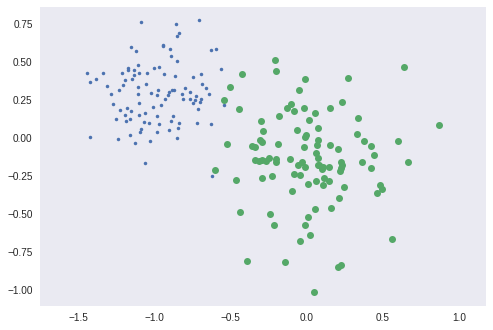

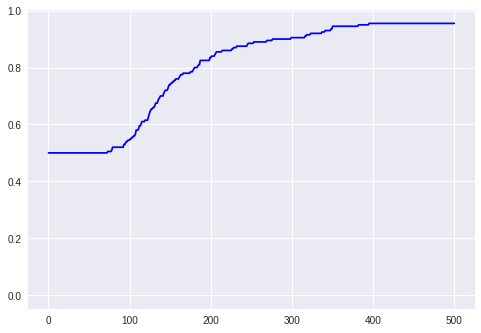

In [ ]:
'''
3.2.1 Classification of linearly non-separable data
'''

global ML_acc_d
ML_acc_d = []

def get_hidden_weights(row, col):
    W_nobias = np.random.normal(loc=(col-1)*[0.0], scale=(col-1)*[0.2], size=(row, col-1))
    bias = np.ones((row,1), dtype=np.int)
    W = np.concatenate((W_nobias, bias),axis=1)  # (1, n)
    return W

def get_lastLayer_weights(col):
    V_nobias = np.random.normal(loc=0.0, scale=0.2, size=col-1)
    bias = np.ones((1), dtype=np.int)
    V = np.concatenate((V_nobias, bias)).reshape(1, -1)  # (1, n)
    return V

def transformation(x):
    transform = (2/(1+np.exp(-x)) - 1)

    return transform

def derivative(x):
    dx = ((1+transformation(x)) * (1-transformation(x))) / 2
    return dx

def forward(x, w, v):
    wx = np.dot(w, x)
    h = transformation(wx)
    vh = np.dot(v, h)
    o = transformation(vh)

    return wx, vh, h, o

def backward(wx, vh, o, targets):
    delta_o = np.multiply((o-targets), derivative(vh))
    delta_h = np.multiply(np.dot(v.T, delta_o), derivative(wx))

    return delta_o, delta_h

def weight_uppdate(x, w, v, targets, eta, alpha, iter, max_iter):
    h_star, o_star, h, o = forward(x, w, v)
    delta_o, delta_h = backward(h_star, o_star, o, targets)

    # accuarcy
    y = np.where(o > 0, 1, -1)
    test = []
    for i in range(y.shape[1]):
        if y[0, i] == targets[0, i]:
            test.append(1)
    acc = np.sum(test) / y.shape[1]
    ML_acc_d.append(acc)

    if iter < max_iter:
        iter += 1
        dw = -eta * np.dot(delta_h, x.T)
        dv = -eta * np.dot(delta_o, h.T)

        # momentum
        dw_momentum = dw*alpha - np.dot(delta_h, x.T)*(1-alpha)
        w_momentum = w + eta * dw_momentum

        dv_momentum = dv*alpha - np.dot(delta_o, h.T)*(1-alpha)
        v_momentum = v + eta * dv_momentum
        #print('V ', v_momentum)
        return weight_uppdate(x, w_momentum, v_momentum, targets, eta, alpha, iter, max_iter)

    return v

w = get_hidden_weights(10,3)
v = get_lastLayer_weights(10)
NL_ClassA, NL_ClassB, NL_test_patterns, NL_test_targets, all_samples_classA, all_samples_classB = generate_STD_nonLinearData(100)
plot_data(NL_ClassA, NL_ClassB)

ML_delt = weight_uppdate(NL_test_patterns.T, w, v, NL_test_targets, eta=0.001, alpha=0.9, iter=0, max_iter=500)

plotacc(0, ML_acc_d)

## 4.1 Data

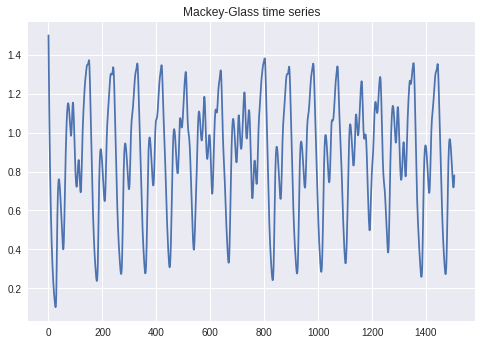

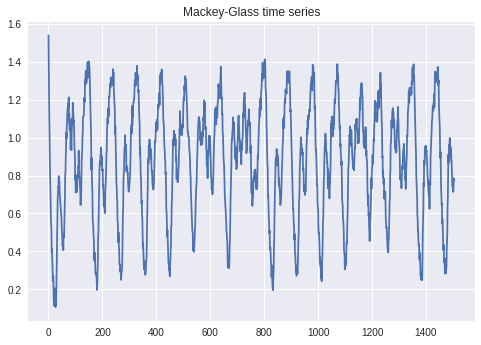

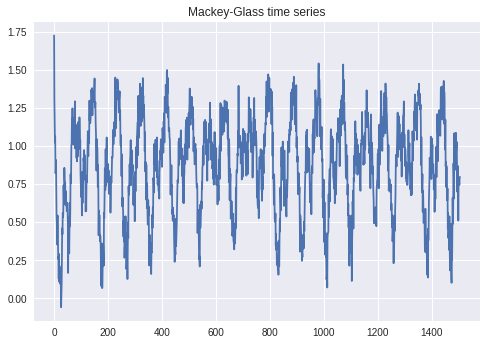

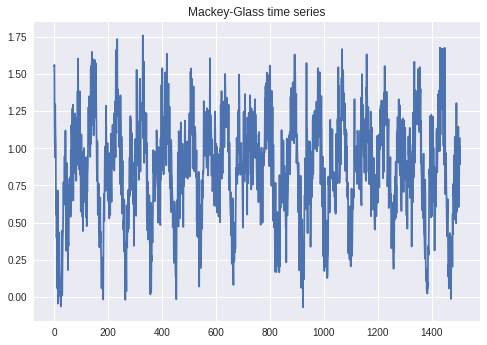

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
np.random.seed(10)

def timeSeriesData(percent, noise=0):
    x = np.zeros(1506)
    x[0] = 1.5
    for i in range(1505):
        if i<25:
            x[i+1] = 0.9 * x[i] 
        else:
            x[i+1] = 0.9 * x[i] + 0.2 * x[i-25] /(1+x[i-25]**10)

    if noise>0:
        x = x + np.random.normal(0,noise,1506)
        
    plt.figure()
    plt.plot(np.linspace(0,1505, 1506), x)
    plt.title("Mackey-Glass time series")
    plt.show()
    
    # input and output
    input = []
    output = []
    for t in range(300, 1500):
        input.append([x[t-20], x[t-15], x[t-10], x[t-50], x[t]])
        output.append(x[t+5])        
    
    test_x = np.array(input[1000:1200]) #(200,5)
    test_y = np.array(output[1000:1200])
    
    # divide data into training and validation set
    # percentage, shuffle=None
    numtrain = int(1000*percent)
    train_x = np.array(input[:numtrain])
    train_y = np.array(output[:numtrain])
    
    valid_x = np.array(input[numtrain:1000])
    valid_y = np.array(output[numtrain:1000])
    
    return train_x, train_y, valid_x, valid_y, test_x, test_y
        

"""Main"""
train_x = [1,2,3,4]
train_y = [1,2,3,4]
valid_x = [1,2,3,4]
valid_y = [1,2,3,4]
test_x = [1,2,3,4]
test_y = [1,2,3,4]
# data set without Gaussian noise
train_x[0], train_y[0], valid_x[0], valid_y[0], test_x[0], test_y[0] = timeSeriesData(percent=0.8)

# data set with addictive Gaussian noise
noiseset = [0.03, 0.09, 0.18]
i = 1
for std in noiseset:
    train_x[i], train_y[i], valid_x[i], valid_y[i], test_x[i], test_y[i] = timeSeriesData(percent=0.8, noise=std)
    i += 1

## 4.2 Network configuration

Using TensorFlow backend.


Epoch: 0001 cost=0.80254140
Validation set loss: 0.7337915
Epoch: 0021 cost=0.07866437
Validation set loss: 0.071339086
Early stopped in epoch 29!!!
Optimization Finished!


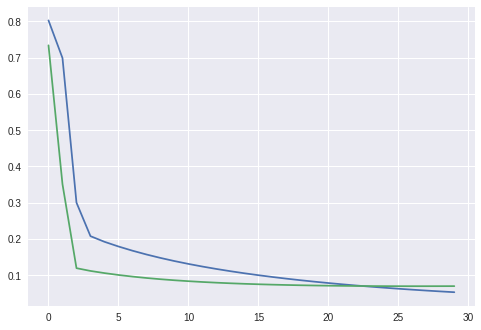

0.0534 , 0.0701 , 0.0589


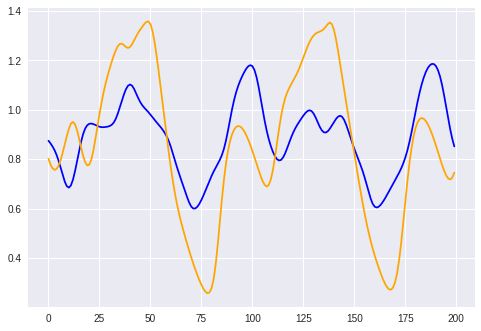

In [ ]:
"""4.2 Network configuration"""
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import timeit
from keras.callbacks import EarlyStopping

"""
Two-layer perceptron
"""
def trainpara(train_x, train_y, valid_x, valid_y, test_x, test_y, nodes_layer1, reg_scale, learning_rate, batch_size, training_epochs, reg=True, minibatch=True, watch=False):
    tf.reset_default_graph() 
    # Define input and output
    X = tf.placeholder(tf.float32, [None, 5], name='x')
    Y = tf.placeholder(tf.float32, name='y')
   
    # hidden layer 1
    W_out = tf.get_variable('W_out', shape=[nodes_layer1, 1])#,regularizer=regularizer)
    b1 = tf.Variable(tf.random_normal([nodes_layer1]), name='b1')
    b_out = tf.Variable(tf.random_normal([1]), name='b_out')    
    
    if reg==True:
        # l2 regularization
        regularizer = tf.contrib.layers.l2_regularizer(scale=reg_scale)
        #regularizer = tf.contrib.layers.l1_regularizer(scale=reg_scale) # l1 regularization
        W1 = tf.get_variable("W1", shape=[5, nodes_layer1], regularizer=regularizer)
        #reg_loss = tf.nn.l2_loss(W1) * reg_scale + tf.nn.l2_loss(W_out) * reg_scale
        reg_loss = tf.losses.get_regularization_loss()
    
    else:
        W1 = tf.get_variable("W1", shape=[5, nodes_layer1])
        reg_loss = 0
        

    # operations throughout the network
    layer_1 = tf.add(tf.matmul(X, W1), b1)
    out_layer = tf.nn.relu(tf.add(tf.matmul(layer_1, W_out), b_out)) #sigmod
                       
    # define optimization problem: mean squared error regression
    mse = tf.losses.mean_squared_error(Y, out_layer) 
    loss_op = mse + reg_loss
    optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
    train_op = optimizer.minimize(loss_op)
    
    # Initializing
    init = tf.global_variables_initializer()
    
    # evaluation
    correct_pred = tf.equal(tf.argmax(out_layer,1), tf.argmax(Y,1))
    
    FLAG=0
    with tf.Session() as sess:
        start_time = timeit.default_timer()
        sess.run(init)

        #EarlyStopping(monitor="val_loss", min_delta = 0.001, patience=3, mode='auto')
        valid_loss = []
        train_loss = []
        
        # Train
        for epoch in range(training_epochs):
            if minibatch==False:
                # batch
                _, avg_cost = sess.run([train_op, loss_op], feed_dict={X: train_x,Y: train_y})   
                train_loss.append(avg_cost)
                
            else:
                # mini batch
                avg_cost = 0.
                total_batch = int(len(train_y)/batch_size)
                # Loop over all batches
                for i in range(total_batch):
                    batch_x = train_x[batch_size*i : batch_size*(i+1)].reshape(batch_size, 5)
                    batch_y = train_y[batch_size*i : batch_size*(i+1)].reshape(batch_size, 1)
                    # Run optimization op (backprop) and cost op (to get loss value)
                    _, c = sess.run([train_op, loss_op], feed_dict={X: batch_x,Y: batch_y})
                    # Compute average loss
                    avg_cost += c 
                avg_cost = avg_cost / total_batch
                train_loss.append(avg_cost)
            
            # validation error
            val_loss = sess.run(loss_op, feed_dict={X: valid_x,Y: valid_y})
            valid_loss.append(val_loss)
            if abs(val_loss-0.907841)<0.000001:
                print("local minima and restart")
                FLAG = 1
                break                
           
            # early stopping
            if len(valid_loss)>10 and val_loss < 0.15 and val_loss > valid_loss[-2] and valid_loss[-2] >= valid_loss[-3] and valid_loss[-3]>=valid_loss[-4]:
                print("Early stopped in epoch {}!!!".format(epoch))
                break
            
            # converge
            """
            if len(train_loss)>50 and avg_cost < 0.11 and avg_cost-train_loss[-5])<0.0000001 and (train_loss[-3]-train_loss[-8])<0.0000001 and (train_loss[-5]-train_loss[-10])<0.000001 :
                print("converged in epoch {}".format(epoch))
                break
            """
            
            # Display logs per epoch step
            if epoch % 20 == 0 and watch==True:
                print("Epoch:", '%04d' % (epoch+1), "cost={:.8f}".format(avg_cost))
                print("Validation set loss: %s" % val_loss)     
            
        print("Optimization Finished!")
        
        # get weight
        weight_1 = sess.run(W1)
        weight_out = sess.run(W_out)
 
        # Test
        predictions = sess.run(out_layer, feed_dict={X: test_x})
        test_error = mean_squared_error(test_y, predictions)
        
        
    if FLAG!=1 and watch==True:
        plt.figure()
        plt.plot(train_loss)
        plt.plot(valid_loss)
        if reg==True:
            plt.figure()
            #weight = np.concatenate((weight_1, weight_out.T))
            weight= weight_1
            plt.hist(weight.reshape(-1,), range=[-1,1], density=True)
        plt.show()
        
    return predictions, train_loss[-1], valid_loss[-1], test_error

# test to find the best model configuration  
predictions, train_loss, valid_loss, test_error = trainpara(train_x[0], train_y[0], valid_x[0], valid_y[0], test_x[0], test_y[0].reshape(-1, 1), 7, 1.0, 0.01, 100, 5000, reg=False, minibatch=True, watch=True)
print("{0:.4f} , {1:.4f} , {2:.4f}".format(train_loss, valid_loss, test_error))
plt.figure()
plt.plot(predictions,'b')
plt.plot(test_y[0],'orange')
plt.show()

In [ ]:
"""
4.3.1
"""

### we should run multiple times to get more statistically significant result 
N = 30

# number of nodes
"""
for i in range(1, 9):
    print("number of node = {0}".format(i))
    tr_error = []
    v_error = []
    te_error = []
    for n in range(N):
        while(1):
            predictions, train_loss, valid_loss, test_error = trainpara(train_x[0], train_y[0], valid_x[0], valid_y[0], test_x[0], test_y[0].reshape(-1, 1), i, 0.1, 0.01, 100, 2000, reg=False, minibatch=True)
            if abs(valid_loss-0.907841)>0.000001:
                tr_error.append(train_loss)
                v_error.append(valid_loss)
                te_error.append(test_error)
                break
            
    # print the result in latex code form (table)
    tr = np.array(tr_error)
    v = np.array(v_error)
    te = np.array(te_error)
    print("{0} & {1:.4f} & {2:.4f} & {3:.4f} & {4:.4f} & {5:.4f} & {6:.4f} \\\\".format(i, np.mean(tr), np.std(tr), np.mean(v), np.std(v), np.mean(te), np.std(te)))
"""
    
# strength of regularization
reg_size = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
#predictions, train_loss, valid_loss = trainpara(train_x[0], train_y[0], valid_x[0], valid_y[0], test_x[0], test_y[0].reshape(-1, 1), 8, 0.01, 0.01, 100, 2000, reg=False, minibatch=True)
#print("None & {0} & {1} & {2} & {3} & {4} & {5} \\".format(tr_error.mean, tr_error.std, v_error.mean, v_error.std, te_error.mean, te_error.std))
for j in reg_size:
    tr_error = []
    v_error = []
    te_error = []
    for n in range(N):
        while(1):
            predictions, train_loss, valid_loss, test_error = trainpara(train_x[0], train_y[0], valid_x[0], valid_y[0], test_x[0], test_y[0].reshape(-1, 1), 8, j, 0.01, 100, 5000, reg=True, minibatch=True)
            if abs(valid_loss-0.907841)>0.000001:
                tr_error.append(train_loss)
                v_error.append(valid_loss)
                te_error.append(test_error)
                break
    tr = np.array(tr_error)
    v = np.array(v_error)
    te = np.array(te_error)
    print("{0} & {1:.4f} & {2:.4f} & {3:.4f} & {4:.4f} & {5:.4f} & {6:.4f} \\\\".format(j, np.mean(tr), np.std(tr), np.mean(v), np.std(v), np.mean(te), np.std(te)))

    """
    plt.figure()
    plt.plot(predictions,'b')
    plt.plot(test_y,'orange')
    plt.show()
    """

Optimization Finished!
Optimization Finished!
Early stopped in epoch 30!!!
Optimization Finished!
Optimization Finished!
Early stopped in epoch 30!!!
Optimization Finished!
Early stopped in epoch 17!!!
Optimization Finished!
Early stopped in epoch 23!!!
Optimization Finished!
Optimization Finished!
Early stopped in epoch 10!!!
Optimization Finished!
Optimization Finished!
Optimization Finished!
Early stopped in epoch 17!!!
Optimization Finished!
Early stopped in epoch 195!!!
Optimization Finished!
Early stopped in epoch 10!!!
Optimization Finished!
Early stopped in epoch 10!!!
Optimization Finished!
Optimization Finished!
Early stopped in epoch 704!!!
Optimization Finished!
Early stopped in epoch 10!!!
Optimization Finished!
Early stopped in epoch 19!!!
Optimization Finished!
Early stopped in epoch 11!!!
Optimization Finished!
Early stopped in epoch 98!!!
Optimization Finished!
Optimization Finished!
Early stopped in epoch 20!!!
Optimization Finished!
Early stopped in epoch 11!!!
Optim

KeyboardInterrupt: ignored

Epoch: 0001 cost=0.54267870
Validation set loss: 0.3633463
Epoch: 0101 cost=0.12362541
Validation set loss: 0.09215273
Epoch: 0201 cost=0.10460134
Validation set loss: 0.08945218
Early stopped in epoch 202!!!
Optimization Finished!


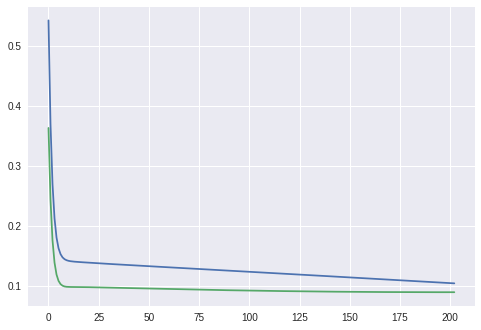

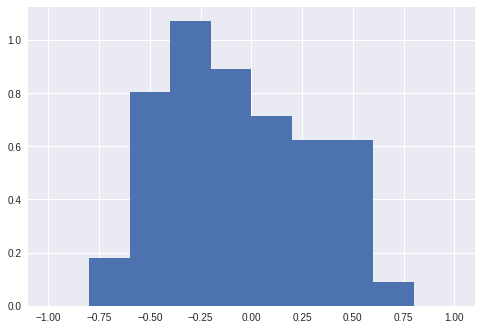

0.1042 , 0.0895 , 0.0765


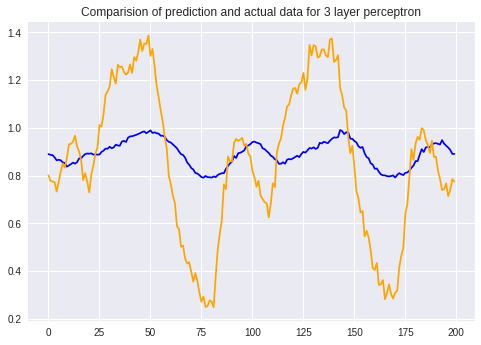

In [ ]:
"""
Three-layer perceptron
"""
def mlp(train_x, train_y, valid_x, valid_y, test_x, test_y, nodes_layer2, reg_scale, learning_rate, batch_size, training_epochs, minibatch=True, see=False):
    tf.reset_default_graph() 
    # Define input and output
    X = tf.placeholder(tf.float32, [None, 5], name='x')
    Y = tf.placeholder(tf.float32, name='y')
   
    # hidden layer 1
    regularizer = tf.contrib.layers.l2_regularizer(scale=reg_scale)
    W1 = tf.get_variable("W1", shape=[5, 8], regularizer=regularizer)
    b1 = tf.Variable(tf.random_normal([8]), name='b1')
    layer_1 = tf.add(tf.matmul(X, W1), b1)
    
    
    # hidden layer 2
    #W2 = tf.Variable(tf.random_normal([7, nodes_layer2]), name='W2')
    W2 = tf.get_variable("W2", shape=[8, nodes_layer2], regularizer=regularizer)
    b2 = tf.Variable(tf.random_normal([nodes_layer2]), name='b2')
    layer_2 = tf.nn.sigmoid(tf.matmul(layer_1, W2) + b2)
    
    # output layer
    b_out = tf.Variable(tf.random_normal([1]), name='b_out')    
    W_out = tf.Variable(tf.random_normal([nodes_layer2, 1]), name='W_out')
    out_layer = tf.nn.relu(tf.add(tf.matmul(layer_2, W_out), b_out))
    
    # define optimization problem: mean squared error regression
    reg_loss = tf.losses.get_regularization_loss()
    mse = tf.losses.mean_squared_error(Y, out_layer) 
    loss_op = mse + reg_loss
    optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
    train_op = optimizer.minimize(loss_op)
    
    # Initializing
    init = tf.global_variables_initializer()
    
    # evaluation
    # correct_pred = tf.equal(tf.argmax(out_layer,1), tf.argmax(Y,1))
    
    FLAG=0
    with tf.Session() as sess:
        start_time = timeit.default_timer()
        sess.run(init)

        #EarlyStopping(monitor="val_loss", min_delta = 0.001, patience=3, mode='auto')
        valid_loss = []
        train_loss = []
        
        # Train
        for epoch in range(training_epochs):
            if minibatch==False:
                # batch
                _, avg_cost = sess.run([train_op, loss_op], feed_dict={X: train_x,Y: train_y})   
                train_loss.append(avg_cost)
                
            else:
                # mini batch
                avg_cost = 0.
                total_batch = int(len(train_y)/batch_size)
                # Loop over all batches
                for i in range(total_batch):
                    batch_x = train_x[batch_size*i : batch_size*(i+1)].reshape(batch_size, 5)
                    batch_y = train_y[batch_size*i : batch_size*(i+1)].reshape(batch_size, 1)
                    # Run optimization op (backprop) and cost op (to get loss value)
                    _, c = sess.run([train_op, loss_op], feed_dict={X: batch_x,Y: batch_y})
                    # Compute average loss
                    avg_cost += c 
                avg_cost = avg_cost / total_batch
                train_loss.append(avg_cost)
            
            # validation error
            val_loss = sess.run(loss_op, feed_dict={X: valid_x,Y: valid_y})
            valid_loss.append(val_loss)
            if abs(val_loss-0.90994513)<0.000001:
                print("local minima and restart")
                FLAG = 1
                break                
           
            # early stopping
            if len(valid_loss)>10 and val_loss < 0.2 and val_loss > valid_loss[-2] and valid_loss[-2] > valid_loss[-3] and valid_loss[-3]>=valid_loss[-4]:
                print("Early stopped in epoch {}!!!".format(epoch))
                end_time = timeit.default_timer()
                break
            
            # converge
            """
            if len(train_loss)>50 and avg_cost < 0.11 and avg_cost-train_loss[-5])<0.0000001 and (train_loss[-3]-train_loss[-8])<0.0000001 and (train_loss[-5]-train_loss[-10])<0.000001 :
                print("converged in epoch {}".format(epoch))
                break
            """
            
            # Display logs per epoch step
            if epoch % 50 == 0 and see==True:
                print("Epoch:", '%04d' % (epoch+1), "cost={:.8f}".format(avg_cost))
                print("Validation set loss: %s" % val_loss)     
        
        end_time = timeit.default_timer()  
        print("Optimization Finished!")
        
        # get weight
        weight_1 = sess.run(W1)
        weight_2 = sess.run(W2)
        weight_out = sess.run(W_out)
 
        # Test
        predictions = sess.run(out_layer, feed_dict={X: test_x})
        test_error = mean_squared_error(test_y, predictions)
        
        
    if FLAG!=1 and see==True:
        plt.figure()
        plt.plot(train_loss)
        plt.plot(valid_loss)
        plt.figure()
        weight = np.concatenate((weight_1, weight_2.T))
        #weight= weight_1
        plt.hist(weight.reshape(-1,), range=[-1,1], density=True)
        plt.show()
        
    return predictions, train_loss[-1], valid_loss[-1], test_error, (end_time-start_time)

### test
predictions, train_loss, valid_loss, test_error, time = mlp(train_x[1], train_y[1], valid_x[1], valid_y[1], test_x[1],test_y[1], 5, 0.1, 0.01, 100, 2000, minibatch=True, see=True)
print("{0:.4f} , {1:.4f} , {2:.4f}, {3:.4f}".format(train_loss, valid_loss, test_error, time))
plt.figure()
plt.title('Comparision of prediction and actual data for 3 layer perceptron')
plt.plot(predictions,'b')
plt.plot(test_y[1],'orange')
plt.show()

In [ ]:
"""
4.3.2
"""
N = 30
### for different noise
for i in range(1, 4):
    print("nnnnnnnnnnnnnnnnnnnnnnnnnoise=", i)
# Number of nodes in the second hidden layer
    time_set = []
    for j in range(1, 9):
        tr_error = []
        v_error = []
        te_error = []
        time_ = 0
        for n in range(N):
            while(1):
                predictions, train_loss, valid_loss, test_error, time = mlp(train_x[i], train_y[i], valid_x[i], valid_y[i], test_x[i], test_y[i], j, 0.1, 0.01, 100, 8000, minibatch=True, see=False)
                if abs(valid_loss-0.90994513)>0.000001:
                    tr_error.append(train_loss)
                    v_error.append(valid_loss)
                    te_error.append(test_error)
                    time_ += time
                    break
        # print the result in latex code form (table)
        tr = np.array(tr_error)
        v = np.array(v_error)
        te = np.array(te_error)
        time_set.append(time_/N)
        print("{0} & {1:.4f} & {2:.4f} & {3:.4f} & {4:.4f} & {5:.4f} & {6:.4f} \\\\".format(j, np.mean(tr), np.std(tr), np.mean(v), np.std(v), np.mean(te), np.std(te)))

    print("{0:.4f} & {1:.4f} & {2:.4f} & {3:.4f} & {4:.4f} & {5:.4f} & {6:.4f} \\\\".format(time_set[0],time_set[1],time_set[2],time_set[3],time_set[4],time_set[5],time_set[6],time_set[7]))
             

# The Effect of regularisation


# The regularisation parameter interact with the amount of noise
reg = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
"""
for i in range(1, 4):
    for j in reg:
        tr_error = []
        v_error = []
        te_error = []
        for n in range(N):
            while(1):
                predictions, train_loss, valid_loss, test_error, time = mlp(train_x[i], train_y[i], valid_x[i], valid_y[i], test_x[i], test_y[i], 5, j, 0.01, 100, 8000, minibatch=True, see=False)
                if abs(valid_loss-0.90994513)>0.000001:
                    tr_error.append(train_loss)
                    v_error.append(valid_loss)
                    te_error.append(test_error)
                    break
            
        # print the result in latex code form (table)
        tr = np.array(tr_error)
        v = np.array(v_error)
        te = np.array(te_error)
        print("{0} & {1:.4f} & {2:.4f} & {3:.4f} & {4:.4f} & {5:.4f} & {6:.4f} \\\\".format(j, np.mean(tr), np.std(tr), np.mean(v), np.std(v), np.mean(te), np.std(te)))
"""

# Compare the best 3-layer model with the 2-layer network in the first task


nnnnnnnnnnnnnnnnnnnnnnnnnoise= 1
Early stopped in epoch 13!!!
Optimization Finished!


KeyboardInterrupt: ignored